# Отток клиентов

Из банка стали уходить клиенты. Маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент в ближайшее время или нет на основе исторических данных о поведении клиентов и расторжении договоров с банком. 

Постройте модель со значением *F1*-меры не менее 0.59.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Общая информация о датасете</a></span></li><li><span><a href="#Обработка-столбцов" data-toc-modified-id="Обработка-столбцов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обработка столбцов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Создание-выборок" data-toc-modified-id="Создание-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Создание выборок</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

## Подготовка данных

### Общая информация о датасете

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import random
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score, roc_curve, roc_auc_score

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


В данных содержится следующая информация:

**Признаки**

- `RowNumber` — индекс строки в данных
- `CustomerId` — уникальный идентификатор клиента
- `Surname` — фамилия
- `CreditScore` — кредитный рейтинг
- `Geography` — страна проживания
- `Gender` — пол
- `Age` — возраст
- `Tenure` — сколько лет человек является клиентом банка
- `Balance` — баланс на счёте
- `NumOfProducts` — количество продуктов банка, используемых клиентом
- `HasCrCard` — наличие кредитной карты
- `IsActiveMember` — активность клиента
- `EstimatedSalary` — предполагаемая зарплата

**Целевой признак**
- `Exited` — факт ухода клиента

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### Обработка столбцов

Данные столбцов `RowNumber`, `CustomerId` и `Surname` являются идентификационными и не несут информации, определяющей уход клиента. Необходимо убрать их из данных.

In [4]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Для удобства переведем названия столбцов в змеиный регистр:

In [5]:
def serpensortia(name):
    new_name = re.findall('[A-Z][^A-Z]*', name)
    new_name = [word.lower() for word in new_name]
    return '_'.join(new_name)
    
data.columns = [serpensortia(name) for name in list(data.columns)]
data.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

### Обработка пропусков

Столбец `tenure` содержит пропуски.

In [6]:
data['tenure'].isna().sum()

909

Для заполнения проспусков используем случайную выборку из иеющихся данных, причем для ушедших и остающихся клиентов отдельно.

In [7]:
n0 = data.loc[data['exited'] == 0,'tenure'].isna().sum() #количество пропусков среди остающихся
fill_0 = list(data.loc[(data['tenure'].notna()) & (data['exited']==0), 'tenure'].sample(n0)) #выборка для остающихся

n1 = data.loc[data['exited'] == 1,'tenure'].isna().sum() #количество пропусков среди ушедших 
fill_1 = list(data.loc[(data['tenure'].notna()) & (data['exited']==1), 'tenure'].sample(n1)) #выборка для ушедшиx

data['tenure'] = pd.concat([data.loc[data['tenure'].notna(), 'tenure'],
                          pd.Series(data=fill_0, index=data[(data['tenure'].isna()) & (data['exited']==0)].index),
                          pd.Series(data=fill_1, index=data[(data['tenure'].isna()) & (data['exited']==1)].index)],
                          )

После обработки датасет выглядит следующим образом:

In [8]:
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


### Подготовка признаков

В данных присутствуют 2 категориальных признака: пол и страна проживания. Для того, чтобы модели могли их обработать, необходимо преобразовать их в количественные. Начнем с признака `gender`:

In [10]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

В данных присутствуют только 2 возможных варианта пола. Разумно закодировать их следующим образом:
- женский - "*1*"
- мужской - "*0*"

In [11]:
data['gender'] = data['gender'].replace(['Male', 'Female'], [0, 1])

Рассмотрим страну проживания - `geography`.

In [12]:
print(*data['geography'].unique())

France Spain Germany


Для кодировки воспользуемся техникой OHE.

In [13]:
data = pd.get_dummies(data, prefix=['geography'], drop_first=True)

В результате предобработки данные имеют следующий вид:

In [14]:
data.head()

,credit_score,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain
0,619,1,42,2.0,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1.0,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8.0,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,1,43,2.0,125510.82,1,1,1,79084.10,0,0,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit_score       10000 non-null  int64  
 1   gender             10000 non-null  int64  
 2   age                10000 non-null  int64  
 3   tenure             10000 non-null  float64
 4   balance            10000 non-null  float64
 5   num_of_products    10000 non-null  int64  
 6   has_cr_card        10000 non-null  int64  
 7   is_active_member   10000 non-null  int64  
 8   estimated_salary   10000 non-null  float64
 9   exited             10000 non-null  int64  
 10  geography_Germany  10000 non-null  uint8  
 11  geography_Spain    10000 non-null  uint8  
dtypes: float64(3), int64(7), uint8(2)
memory usage: 800.9 KB


## Исследование задачи

В качестве возможных моделей рассмотрим модель решающего дерева, случайного леса и логистической регрессии.

### Создание выборок

Тестовая выборка отсутствует, следовательно, имеющиеся данные нужно разбить на три выборки: обучающую, валидационную и тестовую. Размеры тестового и валидационного наборов обычно равны. Исходные данные разобьем в соотношении 3:1:1.

In [16]:
target = data['exited']
features = data.drop('exited', axis = 1)

# отделяем обучающую выборку - 60% всех данных
features, features_train, target, target_train = \
    train_test_split(features, target, test_size=.6, random_state=12345, stratify=target)

# делим оставшиеся данные на равные валидационную и тестовую выборки
features_valid, features_test, target_valid, target_test = \
    train_test_split(features, target, test_size=.5, random_state=12345, stratify=target)

print('Обучающая выборка:', features_train.shape[0], 'строк')
print('Валидационная выборка:', features_valid.shape[0], 'строк')
print('Тестовая выборка:', features_test.shape[0], 'строк')

Обучающая выборка: 6000 строк
Валидационная выборка: 2000 строк
Тестовая выборка: 2000 строк


Для модели логистической регрессии перед обучением необходимо провести масштабирование количественных признаков `balance` и `estimated_salary`.

In [17]:
numeric =['balance', 'estimated_salary']

features_train_scaled = features_train.copy()
features_valid_scaled = features_valid.copy()

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train_scaled[numeric] = scaler.transform(features_train[numeric])
features_valid_scaled[numeric] = scaler.transform(features_valid[numeric])

### Дерево решений

Для начала рассмотрим модель по умолчанию: не будем регулировать гиперпараметры и позволим алгоритму самому решать.

In [18]:
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(features_train, target_train)

print('Глубина полученного дерева:', tree_model.get_depth())

Глубина полученного дерева: 19


In [19]:
predictions_valid = tree_model.predict(features_valid)
tree_f1 = f1_score(target_valid, predictions_valid)

print('F1 на валидационной выборке:', tree_f1.round(4))
print('F1 на обучающей выборке:', f1_score(target_train, tree_model.predict(features_train)))

F1 на валидационной выборке: 0.4869
F1 на обучающей выборке: 1.0


F1 на валидационной выборке меньше требуемого значения 0.59. Модель явно переобучена: угадывает все ответы обучающей выборки. Необходимо откорректировать модель через гиперпараметры. Наиболее понятным для настройки является параметр максимальной глубины дерева. Сократим дерево и определим такую глубину, при которой доля ответов будет наибольшей:

In [20]:
tree_model = None
tree_f1 = 0
tree_max_depth = 0
f1_train_list = []
f1_valid_list = []

for depth in range(2, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    f1_valid_list.append(f1)
    f1_train_list.append(f1_score(target_train, model.predict(features_train)))
    if f1 > tree_f1:
        tree_model, tree_f1, tree_max_depth = model, f1, depth

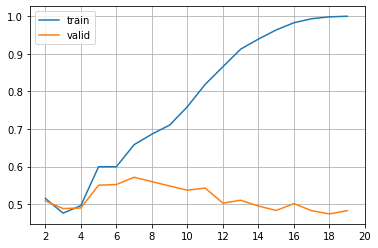

In [21]:
fig, ax = plt.subplots()
plt.plot(range(2,20), f1_train_list, axes=ax, label='train')
plt.plot(range(2,20), f1_valid_list, axes=ax, label='valid')
plt.grid()
plt.xticks(range(2,21,2))
ax.legend()
None

In [22]:
print('Глубина дерева решений:', tree_max_depth)
print('F1 =', tree_f1.round(4))

Глубина дерева решений: 7
F1 = 0.5714


In [23]:
f1_score(target_train, tree_model.predict(features_train)).round(4)

0.6581

Регулировкой одного параметра удалось улучшить качество модели: F1 на валидационной выборке возросла, модель менее переобучена, но все не удоветворяет требованиям. 

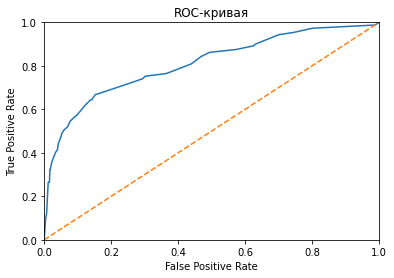

In [24]:
def print_roc(fpr, tpr, thresholds):
    plt.plot(fpr, tpr)
    # ROC-кривая случайной модели
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.ylim([0.0, 1.0])
    plt.xlim([0.0, 1.0])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC-кривая")

    plt.show()
    
probabilities_valid = tree_model.predict_proba(features_valid)[:,1]
print_roc(*roc_curve(target_valid, probabilities_valid))

In [25]:
tree_auc_roc = roc_auc_score(target_valid, probabilities_valid)
tree_auc_roc.round(4)

0.8084

Значение AUC-ROC > 0.5, модель лучше случайной.

In [26]:
# сохраним значения в словаре для будущего сравнения
summary = {}
summary['Дерево решений'] = [f1_score(target_train, tree_model.predict(features_train)), tree_f1, tree_auc_roc]

### Случайный лес

Модель случайного леса представляет собой набор деревьев решений. Для пробного раза позволим алгоритму обучиться в вольном стиле, используя все параметры по умолчанию:

In [27]:
forest_model = RandomForestClassifier(random_state=1)
  
forest_model.fit(features_train, target_train)
predictions_valid = forest_model.predict(features_valid)
forest_f1 = f1_score(target_valid, predictions_valid)

print('F1 на валидационной выборке:', forest_f1.round(4))
print('F1 на обучающей выборке:', f1_score(target_train, forest_model.predict(features_train)).round(4))

F1 на валидационной выборке: 0.5434
F1 на обучающей выборке: 1.0


Модель не удовлетворяет требованиям по F1, переобучена, поэтому необходимо провести дополнительную настройку. Ключевыми гиперпараметрами случайного леса являются максимальная глубина отдельного дерева и количество деревьев. Перебором определим сочетание параметров, при котором точность предсказаний на валидационной выборке наибольшая:

In [28]:
forest_model = None
forest_f1 = 0
forest_max_depth = 0

for depth in range(1, 11):
    for n_est in range(2, 31):
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_est, random_state=0)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > forest_f1:
            forest_model, forest_f1, forest_max_depth, forest_n_est = model, f1, depth, n_est

print('max_depth =', forest_max_depth)
print('n_est =', forest_n_est)

print('F1 на валидационной выборке:', forest_f1.round(4))
print('F1 на обучающей выборке:', f1_score(target_train, forest_model.predict(features_train)).round(4))

max_depth = 8
n_est = 9
F1 на валидационной выборке: 0.5554
F1 на обучающей выборке: 0.6278


Модель стала лучше предсказывать результаты для валидационной выборки и стала менее переобученной. Однако значение 0.59 не достигнуто.

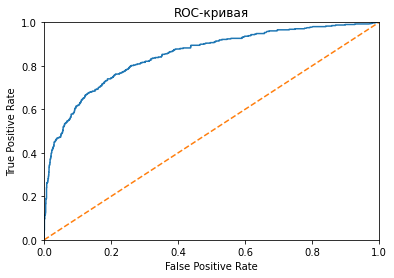

In [29]:
probabilities_valid = forest_model.predict_proba(features_valid)[:,1]
print_roc(*roc_curve(target_valid, probabilities_valid))

In [30]:
forest_auc_roc = roc_auc_score(target_valid, probabilities_valid)
summary['Случайный лес'] = [f1_score(target_train, forest_model.predict(features_train)), forest_f1, forest_auc_roc]
forest_auc_roc.round(4)

0.8495

Значение AUC-ROC > 0.5, модель лучше случайной.

### Логистическая регрессия

Для обучения модели логистической регрессии необходимоиспользовать масштабированные количественные признаки.

In [31]:
lr_model = LogisticRegression(solver='liblinear', random_state=1)

lr_model.fit(features_train_scaled, target_train)
predictions_valid = lr_model.predict(features_valid_scaled)
lr_f1 = f1_score(target_valid, predictions_valid)

In [32]:
print('F1 на валидационной выборке:', f1_score(target_valid, lr_model.predict(features_valid)).round(4))
print('F1 на обучающей выборке:', f1_score(target_train, lr_model.predict(features_train)).round(4))

F1 на валидационной выборке: 0.3389
F1 на обучающей выборке: 0.3385


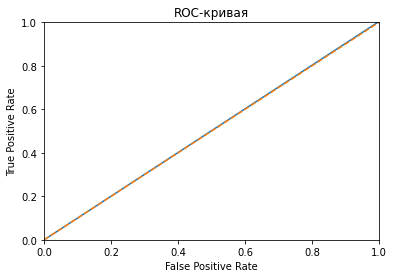

In [33]:
probabilities_valid = lr_model.predict_proba(features_valid)[:,1]
print_roc(*roc_curve(target_valid, probabilities_valid))

In [34]:
lr_auc_roc = roc_auc_score(target_valid, probabilities_valid)
summary['Логистическая регрессия'] = [f1_score(target_train, lr_model.predict(features_train)), lr_f1, lr_auc_roc]
lr_auc_roc.round(4)

0.5019

У модели очень низкое значение F1, а AUC-ROC почти равна 0.5, то есть она не лучше случайной.

### Выводы

Были рассмотрены следующие модели:

- Дерево решений
    - max_depth = 7

- Случайный лес
    - max_depth = 8    
    - n_est = 21

- Логистическая регрессия

Сравним их метрики F1 на обучающей и валидационных выборках и AUC-ROC:

In [35]:
pd.options.display.float_format = '{:,.4f}'.format #dataframe output formatting

summary = pd.DataFrame(summary.values(), index=summary.keys(),
                       columns=['Обучающая выборка','Валидационная выборка', 'AUC-ROC'])
summary

,Обучающая выборка,Валидационная выборка,AUC-ROC
Дерево решений,0.6581,0.5714,0.8084
Случайный лес,0.6278,0.5554,0.8495
Логистическая регрессия,0.3385,0.3437,0.5019


Ни одна модель не достигла требуемого значения F1. Качество моделей дерева решений и случайного леса сопоставимо, модель логистической регресси показывает худшие результаты по всем метрикам.

## Борьба с дисбалансом

Рассмотрим структуру данных: как представлены данные ушедших и оставшихся клиентов.

In [36]:
data['exited'].value_counts(normalize=True)

0   0.7963
1   0.2037
Name: exited, dtype: float64

Данных об ушедших клиентах почти в 4 раза меньше, чем об оставшихся. Необходимо избавиться от дисбаланса классов.

### Взвешивание классов

Переобучим все модели, используя параметр ```class_weight=True```.

In [37]:
tree_model = None
tree_f1 = 0
tree_max_depth = 0

for depth in range(2, 20):
    model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=1)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > tree_f1:
        tree_model, tree_f1, tree_max_depth = model, f1, depth

print('max_depth =', tree_max_depth)
        
print('F1 на валидационной выборке:', tree_f1.round(4))
print('F1 на обучающей выборке:', f1_score(target_train, tree_model.predict(features_train)).round(4))

probabilities_valid = tree_model.predict_proba(features_valid)[:,1]
tree_auc_roc = roc_auc_score(target_valid, probabilities_valid)
print('AUC-ROC:', tree_auc_roc.round(4))

summary_balanced = {}
summary_balanced['Дерево решений'] = [f1_score(target_train, tree_model.predict(features_train)), tree_f1, tree_auc_roc]

max_depth = 6
F1 на валидационной выборке: 0.5848
F1 на обучающей выборке: 0.5902
AUC-ROC: 0.8298


In [38]:
forest_model = None
forest_f1 = 0
forest_max_depth = 0

for depth in range(1, 11):
    for n_est in range(2, 31):
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_est, class_weight='balanced', random_state=0)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > forest_f1:
            forest_model, forest_f1, forest_max_depth, forest_n_est = model, f1, depth, n_est

print('max_depth =', forest_max_depth)
print('n_est =', forest_n_est)
print()
print('F1 на валидационной выборке:', forest_f1.round(4))
print('F1 на обучающей выборке:', f1_score(target_train, forest_model.predict(features_train)).round(4))

probabilities_valid = forest_model.predict_proba(features_valid)[:,1]
forest_auc_roc = roc_auc_score(target_valid, probabilities_valid)
print('AUC-ROC:', forest_auc_roc.round(4))

summary_balanced['Случайный лес'] = [f1_score(target_train, forest_model.predict(features_train)), forest_f1, forest_auc_roc]

max_depth = 6
n_est = 27

F1 на валидационной выборке: 0.6145
F1 на обучающей выборке: 0.6371
AUC-ROC: 0.8504


In [39]:
lr_model = LogisticRegression(solver='liblinear', random_state=1, class_weight='balanced')
lr_model.fit(features_train_scaled, target_train)

predictions_valid = lr_model.predict(features_valid_scaled)
lr_f1 = f1_score(target_valid, predictions_valid)


print('f1 на валидационной выборке:', f1_score(target_valid, lr_model.predict(features_valid_scaled)).round(4))
print('f1 на обучающей выборке:', f1_score(target_train, lr_model.predict(features_train_scaled)).round(4))

probabilities_valid = lr_model.predict_proba(features_valid_scaled)[:,1]
lr_auc_roc = roc_auc_score(target_valid, probabilities_valid)
print('AUC-ROC:', lr_auc_roc.round(4))

summary_balanced['Логистическая регрессия'] = [f1_score(target_train, lr_model.predict(features_train_scaled)), lr_f1, lr_auc_roc]

f1 на валидационной выборке: 0.4929
f1 на обучающей выборке: 0.488
AUC-ROC: 0.7616


In [40]:
summary_balanced = pd.DataFrame(summary_balanced.values(), index=summary_balanced.keys(),
                                columns=['Обучающая выборка','Валидационная выборка', 'AUC-ROC'])
summary_balanced

,Обучающая выборка,Валидационная выборка,AUC-ROC
Дерево решений,0.5902,0.5848,0.8298
Случайный лес,0.6371,0.6145,0.8504
Логистическая регрессия,0.4880,0.4929,0.7616


Сравним новые показатели с предыдущими:

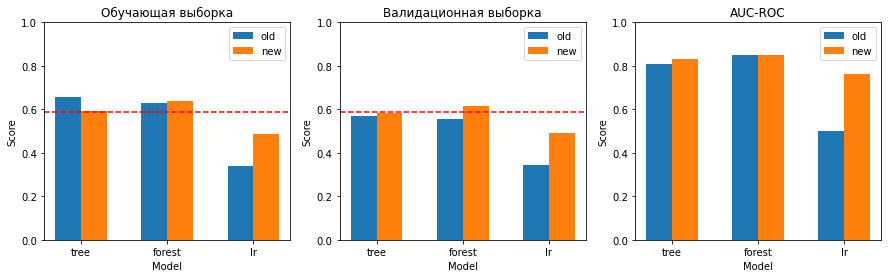

In [41]:
def plot_comparisson(ax, x, old, new, title, labels):
  
    x_axis = np.arange(len(x))
  
    ax.bar(x_axis - 0.15, old, 0.3, label=labels[0])
    ax.bar(x_axis + 0.15, new, 0.3, label=labels[1])
  
    ax.set_xticks(x_axis)
    ax.set_xticklabels(x)
    ax.set_xlabel("Model")
    ax.set_ylabel("Score")
    ax.set_title(title)
    ax.set_ylim(0,1)
    ax.legend()

fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(4)
fig.set_figwidth(15)


title = 'Обучающая выборка'
labels = ['old', 'new']

plot_comparisson(ax[0], ['tree', 'forest', 'lr'], summary[title], summary_balanced[title], title, labels)
ax[0].axhline(y=0.59, color='r', ls='--')

title = 'Валидационная выборка'
plot_comparisson(ax[1], ['tree', 'forest', 'lr'], summary[title], summary_balanced[title], title, labels)
ax[1].axhline(y=0.59, color='r', ls='--')

title = 'AUC-ROC'
plot_comparisson(ax[2], ['tree', 'forest', 'lr'], summary[title], summary_balanced[title], title, labels)

F1 и AUC-ROC улучшилось для всех моделей. Особенно чуствительной к качеству данных оказалась модель логистической регрессии. Для модели случайного леса удалось добиться требуемого значения F1.

### Upsampling

Так же уменьшить дисбаланс можно путем дублирования данных меньшего класса. Значений 1 в 4 раза меньше, чем 0. Увеличим выборку с меньшим классом в 4 раза.

In [42]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
features_scaled_upsampled, target_upsampled = upsample(features_train_scaled, target_train, 4)

In [43]:
tree_model = None
tree_f1 = 0
tree_max_depth = 0

for depth in range(2, 20):
    model = DecisionTreeClassifier(max_depth=depth, random_state=1)
    model.fit(features_upsampled, target_upsampled)
    predictions_valid = model.predict(features_valid)
    f1 = f1_score(target_valid, predictions_valid)
    if f1 > tree_f1:
        tree_model, tree_f1, tree_max_depth = model, f1, depth

print('max_depth =', tree_max_depth)
        
print('F1 на валидационной выборке:', tree_f1.round(4))
print('F1 на обучающей выборке:', f1_score(target_train, tree_model.predict(features_train)).round(4))

probabilities_valid = tree_model.predict_proba(features_valid)[:,1]
tree_auc_roc = roc_auc_score(target_valid, probabilities_valid)
print('AUC-ROC:', tree_auc_roc.round(4))

summary_upsampled = {}
summary_upsampled['Дерево решений'] = [f1_score(target_train, tree_model.predict(features_train)), tree_f1, tree_auc_roc]

max_depth = 6
F1 на валидационной выборке: 0.5887
F1 на обучающей выборке: 0.5902
AUC-ROC: 0.8368


In [44]:
forest_model = None
forest_f1 = 0
forest_max_depth = 0

for depth in range(1, 11):
    for n_est in range(2, 31):
        model = RandomForestClassifier(max_depth=depth, n_estimators=n_est, random_state=0)
        model.fit(features_upsampled, target_upsampled)
        predictions_valid = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions_valid)
        if f1 > forest_f1:
            forest_model, forest_f1, forest_max_depth, forest_n_est = model, f1, depth, n_est

print('max_depth =', forest_max_depth)
print('n_est =', forest_n_est)

print('F1 на валидационной выборке:', forest_f1.round(4))
print('F1 на обучающей выборке:', f1_score(target_train, forest_model.predict(features_train)).round(4))

probabilities_valid = forest_model.predict_proba(features_valid)[:,1]
forest_auc_roc = roc_auc_score(target_valid, probabilities_valid)
print('AUC-ROC:', forest_auc_roc.round(4))

summary_upsampled['Случайный лес'] = [f1_score(target_train, forest_model.predict(features_train)), forest_f1, forest_auc_roc]

max_depth = 8
n_est = 28
F1 на валидационной выборке: 0.6193
F1 на обучающей выборке: 0.7002
AUC-ROC: 0.8534


In [45]:
lr_model = LogisticRegression(solver='liblinear', random_state=1, class_weight='balanced')
lr_model.fit(features_scaled_upsampled, target_upsampled)

predictions_valid = lr_model.predict(features_valid_scaled)
lr_f1 = f1_score(target_valid, predictions_valid)


print('f1 на валидационной выборке:', f1_score(target_valid, lr_model.predict(features_valid_scaled)).round(4))
print('f1 на обучающей выборке:', f1_score(target_train, lr_model.predict(features_train_scaled)).round(4))

probabilities_valid = lr_model.predict_proba(features_valid_scaled)[:,1]
lr_auc_roc = roc_auc_score(target_valid, probabilities_valid)
print('AUC-ROC:', lr_auc_roc.round(4))

summary_upsampled['Логистическая регрессия'] = \
[f1_score(target_train, lr_model.predict(features_train_scaled)), lr_f1, lr_auc_roc]

f1 на валидационной выборке: 0.4956
f1 на обучающей выборке: 0.4894
AUC-ROC: 0.7618


In [46]:
summary_upsampled = pd.DataFrame(summary_upsampled.values(), index=summary_upsampled.keys(),
                                columns=['Обучающая выборка','Валидационная выборка', 'AUC-ROC'])
summary_upsampled

,Обучающая выборка,Валидационная выборка,AUC-ROC
Дерево решений,0.5902,0.5887,0.8368
Случайный лес,0.7002,0.6193,0.8534
Логистическая регрессия,0.4894,0.4956,0.7618


Сравним результаты с первоначальными моделями.

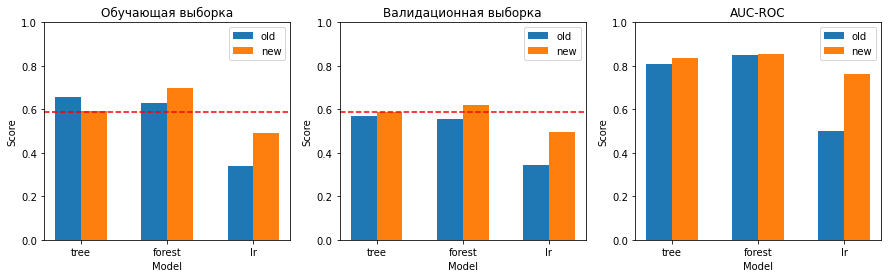

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(4)
fig.set_figwidth(15)

title = 'Обучающая выборка'
labels = ['old', 'new']

plot_comparisson(ax[0], ['tree', 'forest', 'lr'], summary[title], summary_upsampled[title], title, labels)
ax[0].axhline(y=0.59, color='r', ls='--')

title = 'Валидационная выборка'
plot_comparisson(ax[1], ['tree', 'forest', 'lr'], summary[title], summary_upsampled[title], title, labels)
ax[1].axhline(y=0.59, color='r', ls='--')

title = 'AUC-ROC'
plot_comparisson(ax[2], ['tree', 'forest', 'lr'], summary[title], summary_upsampled[title], title, labels)

Как и ранее, F1 и AUC-ROC улучшилось для всех моделей. Особенно чуствительной к качеству данных оказалась модель логистической регрессии. Для модели случайного леса удалось добиться требуемого значения F1.
Сравним результаты разных техник:

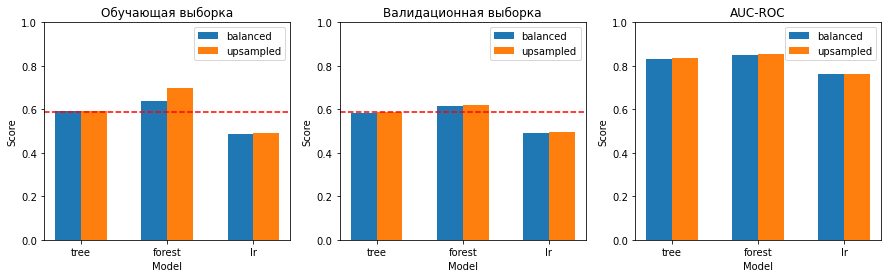

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.set_figheight(4)
fig.set_figwidth(15)

title = 'Обучающая выборка'
labels = ['balanced', 'upsampled']

plot_comparisson(ax[0], ['tree', 'forest', 'lr'], summary_balanced[title], summary_upsampled[title], title, labels)
ax[0].axhline(y=0.59, color='r', ls='--')

title = 'Валидационная выборка'
plot_comparisson(ax[1], ['tree', 'forest', 'lr'], summary_balanced[title], summary_upsampled[title], title, labels)
ax[1].axhline(y=0.59, color='r', ls='--')

title = 'AUC-ROC'
plot_comparisson(ax[2], ['tree', 'forest', 'lr'], summary_balanced[title], summary_upsampled[title], title, labels)

При использовании upsampling мы получили F1 и AUC-ROC немного выше, чем при балансировки классов.

### Выводы

На данном этабе для борьбы с дисбалансом были рассмотрены два пути: взвешивание классов и Upsampling. Модели, полученные ранее, были обучены заново. В результате качество всех моделей улучшилось. Модели логистической регрессии показала наибольший рост показателей, однако только модель случайного леса на валидационной выборке имеет показатель F1 больше 0.59. Эта модель выбрана для проверки на тестовой выборке.

## Тестирование модели

In [49]:
model = forest_model

In [50]:
predictions = model.predict(features_test)

f1_score(target_test, predictions).round(4)

0.6069

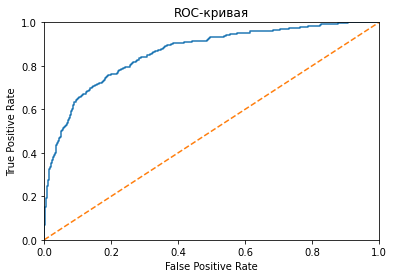

In [51]:
probabilities = model.predict_proba(features_test)[:,1]
print_roc(*roc_curve(target_test, probabilities))

In [52]:
probabilities = model.predict_proba(features_test)[:,1]
auc_roc = roc_auc_score(target_test, probabilities)
print('AUC-ROC:', auc_roc.round(4))

AUC-ROC: 0.862


Модель удовлетворяет требованиям и имеет высокое значение AUC-ROC.

## Вывод

В рамках проекта была выполнена предобработка данных: были убраны излишние данные, заполнены пропуски. Данные были подготовлены для обучения: категориальные признаки были обработаны методами прямого кодирования и OHE. 
    
В качестве потенциальных моделей рассмотрены модели решающего дерева, случайного леса и логистической регрессии. Для каждой из них были подобраны гиперпараметры для улучшения качества. При первом обучении результаты оказались недостаточно хорошими - все модели не превысили требуемого значения метрики F1. 

После анализа данных был выявлен дисбаланс классов. Для борьбы с дисбалансом были использованы 2 метода: увеличение веса меньшего класса и увеличение его выборки в данных. Оба метода позволили улучшить качество каждой из моделей.
    
Наилучший результат показала модель случайного леса при обучении данными, обработанными техникой upsampling. На тестовой выборке F1 мера превысила требуемый порог.